# Image processing in Python 

### Importing libraries and getting started

In [1]:
%matplotlib inline
from sklearn.datasets import load_digits
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
digits = load_digits()

In [3]:
first_image = digits.images[0]
print("Digits is a N={} dataset of handwritten digits, stored as {} by {} gray-scale images".format(
digits.images.shape[0], first_image.shape[0], first_image.shape[1]))
#print(digits.DESCR)

Digits is a N=1797 dataset of handwritten digits, stored as 8 by 8 gray-scale images


In [4]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

## Image representation

An image is a 2-dimensional array of integers in the range 0-15. The value of a cell represents the intensity of the ink at that location, i.e. how black the cell should be rendered. A cell with a value of zero will be rendered as white, while a value of 15 signifies the darkest black. Values in between are grayscale.

In [5]:
first_image

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

Can you guess what digit this? Otherwise the representation below might help.

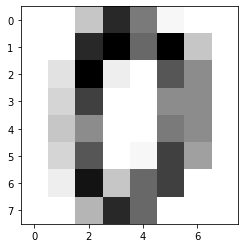

In [6]:
plt.imshow(first_image, cmap='Greys', interpolation='none');

In [85]:
random_pixel = first_image[2, 3]
random_pixel

2.0

In [5]:
first_image.shape

(8, 8)

In [7]:
first_image.reshape(-1).shape

(64,)

In [6]:
first_image.reshape(-1)

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [9]:
# Labels are supplied in the `target` attribute of the `digits` object. 
# The labels are integers corresponding to the digits.
digits.target

array([0, 1, 2, ..., 8, 9, 8])

**Exercise** Investigate other digits.

In [ ]:
# Your code here

### RGB

Color images are represented as 3-dimensional structures. The two first dimensions are the rows and columns of the image. The third dimension contains color information, most typically represented by three numbers indicating the mixture of **R**ed, **G**reen, and **B**lue (RGB) in the color.

Working with 3-dimensional images is actually not that different from working with 2-dimensional images, and you won't have to learn any new functions.

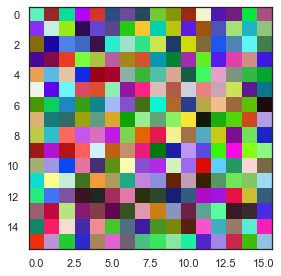

In [86]:
np.random.seed(42)
random_color_image = np.random.random((16, 16, 3))
imshow(random_color_image);

In [87]:
almost_blue_pixel = random_color_image[4, 3]
almost_blue_pixel

array([0.08413996, 0.16162871, 0.89855419])

**Exercise** Make separate red, green and blue pixel arrays called `red_pixel`, `green_pixel` and `blue_pixel`. They should have the s# Your code hereame shape as `almost_blue_pixel`. Then display all of them in a 5 by 1 image, where the fourth pixel is the sum of the previous three, and the fifth pixel consists of all zeros.

In [ ]:
# Your code here

## Inspecting filters

In [7]:
%matplotlib inline
from skimage import io, draw, color, measure
import skimage.data, skimage.filters, skimage.io, skimage.draw
from skimage.io import imshow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import cdist

sns.set_context("notebook")
sns.set_style("white")

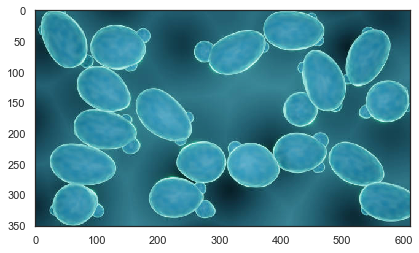

In [8]:
# image from: https://www.google.com/search?q=yeast+images&tbm=isch&ved=2ahUKEwjUz-X_ldWCAxXcyAIHHYbhA1oQ2-cCegQIABAA&oq=yeast+images&gs_lcp=CgNpbWcQAzIFCAAQgAQyBQgAEIAEMgUIABCABDIFCAAQgAQyBQgAEIAEMgUIABCABDIGCAAQBRAeMgYIABAFEB4yBggAEAUQHjIGCAAQBRAeOgQIIxAnOgoIABCABBCKBRBDUNAJWIcYYLYaaABwAHgAgAFiiAHuCJIBAjEzmAEAoAEBqgELZ3dzLXdpei1pbWfAAQE&sclient=img&ei=FK1cZdT1C9yRi-gPhsOP0AU&bih=963&biw=1920&rlz=1C1GCEA_enDK978DK978#imgrc=6qAuQC86zVkngM

yeast = io.imread("yeast.jpg")
yeast = skimage.img_as_float(yeast)
imshow(yeast)

In [10]:
yeast.shape

(352, 612, 3)

Let's visualize it in greyscale

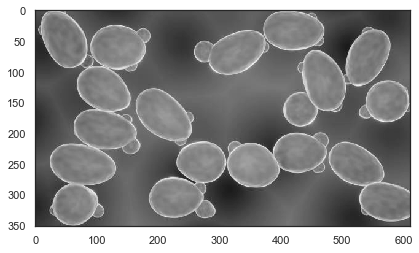

In [93]:
greyscale = color.rgb2gray(yeast)
imshow(greyscale)

In [94]:
greyscale.shape

(352, 612)

Note: the shape of the array changes between colors and greyscale, can you think of why?

In [103]:
print(yeast)

[[[0.13333333 0.36470588 0.42745098]
  [0.13333333 0.36470588 0.42745098]
  [0.13333333 0.36470588 0.42745098]
  ...
  [0.09803922 0.30196078 0.35686275]
  [0.09803922 0.30196078 0.35686275]
  [0.09803922 0.30196078 0.35686275]]

 [[0.12941176 0.36078431 0.42352941]
  [0.12941176 0.36078431 0.42352941]
  [0.12941176 0.36078431 0.42352941]
  ...
  [0.09803922 0.30196078 0.35686275]
  [0.09803922 0.30196078 0.35686275]
  [0.09803922 0.30196078 0.35686275]]

 [[0.12941176 0.36078431 0.42352941]
  [0.12941176 0.36078431 0.42352941]
  [0.12941176 0.36078431 0.42352941]
  ...
  [0.09803922 0.30196078 0.35686275]
  [0.09803922 0.30196078 0.35686275]
  [0.09803922 0.30196078 0.35686275]]

 ...

 [[0.07843137 0.24313725 0.29803922]
  [0.07843137 0.24313725 0.29803922]
  [0.07843137 0.24313725 0.29803922]
  ...
  [0.1372549  0.37647059 0.44705882]
  [0.1372549  0.37647059 0.44705882]
  [0.1372549  0.37647059 0.44705882]]

 [[0.07843137 0.24313725 0.29803922]
  [0.08235294 0.24705882 0.30196078]


In [102]:
print(greyscale)

[[0.32006314 0.32006314 0.32006314 ... 0.26258588 0.26258588 0.26258588]
 [0.31614157 0.31614157 0.31614157 ... 0.26258588 0.26258588 0.26258588]
 [0.31614157 0.31614157 0.31614157 ... 0.26258588 0.26258588 0.26258588]
 ...
 [0.21209569 0.21209569 0.21209569 ... 0.33072667 0.33072667 0.33072667]
 [0.21209569 0.21601725 0.21601725 ... 0.3268051  0.3268051  0.3268051 ]
 [0.21601725 0.21601725 0.21601725 ... 0.3268051  0.3268051  0.3268051 ]]


### Zoom in
The image looks pretty blue, but in reality there are multiple shades of colors.

Zooming in on a 50 by 50 patch of the image, it's clear that it consists of different blue colors.

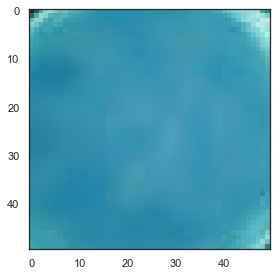

In [50]:
yeast_zoom = yeast[290:340, 40:90]
imshow(yeast_zoom);

### Distance to average blue

C:\Users\fiacac\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


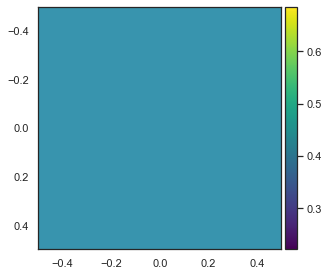

In [54]:
# Get average color in this patch
average_blue = np.array([yeast_zoom[:,:,0].mean(), yeast_zoom[:,:,1].mean(), yeast_zoom[:,:,2].mean()])
imshow(average_blue.reshape(1, 1, 3));

Calculate the distance between this blue color and all the pixels of the image

In [57]:
distances = cdist(average_blue.reshape(1, 3), yeast.reshape(-1, 3))
distances.shape

(1, 215424)

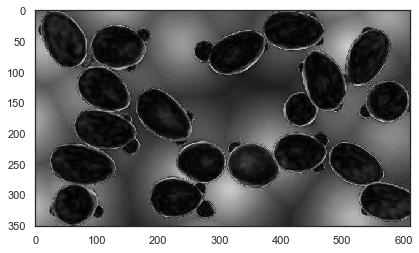

In [63]:
distance_img = distances.reshape(yeast.shape[0], yeast.shape[1])
# Convert into the range (0, 1)
distance_img /= distance_img.max()
imshow(distance_img)

The greyscale image indicates the degree of blueness of each pixel. We can take a firm stand on the blueness issue by applying a **threshold** on the greyscale image. 
Intuitively, we are saying that every pixel with a distance of, say, less than $.4$ to the average blue is to be considered blue. All other pixels are just "not-blue".

The result of applying the threshold is a binary image, sometimes called a *mask*.

In [78]:
distance_img.shape

(352, 612)

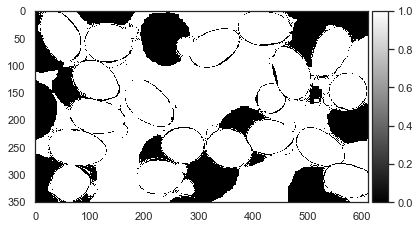

In [72]:
imshow((distance_img <= 0.4)*1, cmap='gray')

Finding a good threshold may require experimentation: too high a value, and suddenly everything is blue; too low a value, and everything is grey...

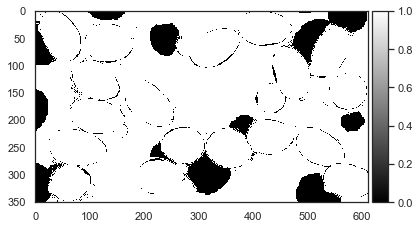

In [73]:
imshow((distance_img <= 0.5)*1, cmap='gray')

A value of zero indicates "lights off", whereas a value of one is bright sunlight. We can therefore adjust the overall lightness of an image simply by scaling the matrix representing the image.

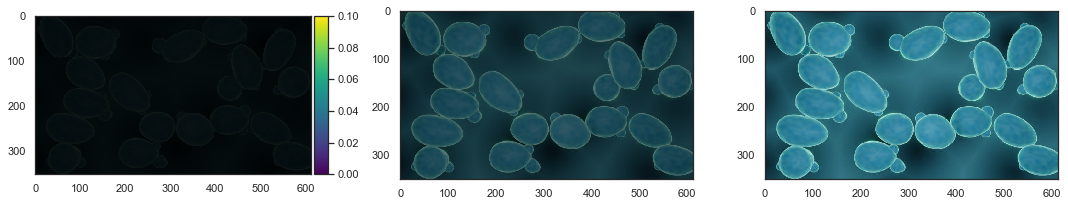

In [82]:
# Create a three-axis subplot
fig, axes = plt.subplots(ncols=3,figsize=(15, 15))

# `sca` abbrevates "set current axis"
for i, scaling in enumerate([.1, .5, .9]):
    plt.sca(axes[i])
    imshow(yeast * scaling)

### Using the mask
We can actually extract pixels from the original image by using the mask. More precisely, we can extract all the pixels that are red according to our threshold.

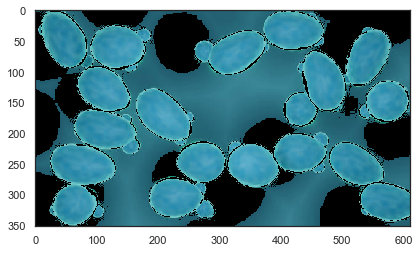

In [74]:
blank_image = np.zeros_like(yeast)
mask = distance_img < 0.4
blank_image[mask] = yeast[mask]
imshow(blank_image);

## Kernel operation

Section inspired by https://medium.com/swlh/image-processing-with-python-convolutional-filters-and-kernels-b9884d91a8fd

In [105]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.color import rgb2gray
from skimage.transform import rescale
from scipy.signal import convolve2d

Let's define a function that will apply the convolution function in all channels of the image, as shown below

In [106]:
def rgb_convolve2d(image, kernel):
    red = convolve2d(image[:,:,0], kernel, 'valid')
    green = convolve2d(image[:,:,1], kernel, 'valid')
    blue = convolve2d(image[:,:,2], kernel, 'valid')
    return np.stack([red, green, blue], axis=2)

Now, let’s try to apply the identity filter to the image

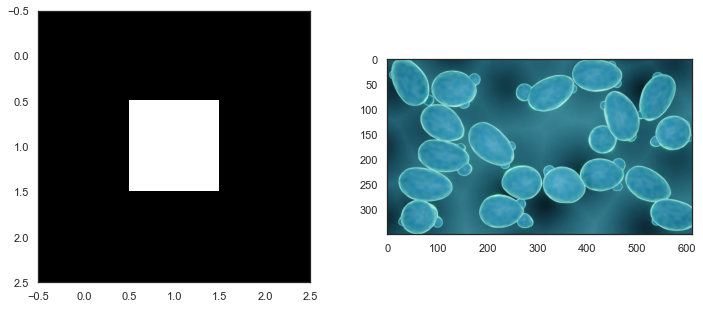

In [107]:
identity = np.array([[0, 0, 0],
                     [0, 1, 0],
                     [0, 0, 0]])
conv_im1 = rgb_convolve2d(yeast, identity)
fig, ax = plt.subplots(1,2, figsize=(12,5))
ax[0].imshow(identity, cmap='gray')
ax[1].imshow(abs(conv_im1), cmap='gray');

As expected, nothing happens! As the filter’s name suggests, the identity kernel will return the input image itself.

Now, let’s try edge detection filters on the grayscale image.

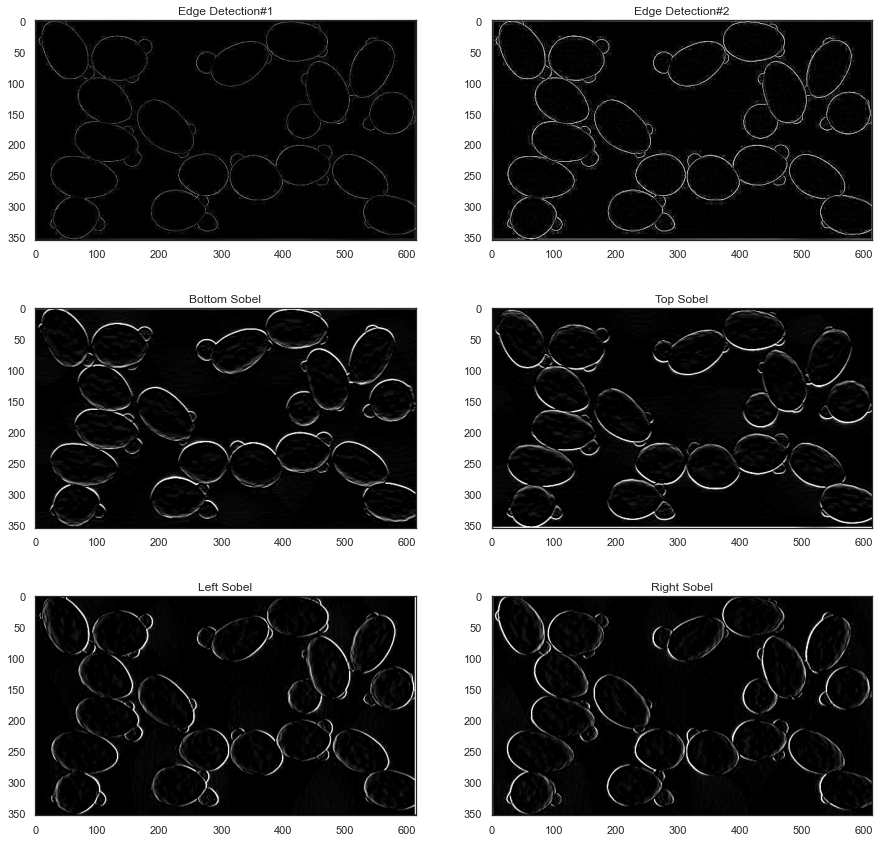

In [117]:
# Edge Detection1
kernel1 = np.array([[0, -1, 0],
                    [-1, 4, -1],
                    [0, -1, 0]])
# Edge Detection2
kernel2 = np.array([[-1, -1, -1],
                    [-1, 8, -1],
                    [-1, -1, -1]])
# Bottom Sobel Filter
kernel3 = np.array([[-1, -2, -1],
                    [0, 0, 0],
                    [1, 2, 1]])
# Top Sobel Filter
kernel4 = np.array([[1, 2, 1],
                    [0, 0, 0],
                    [-1, -2, -1]])
# Left Sobel Filter
kernel5 = np.array([[1, 0, -1],
                    [2, 0, -2],
                    [1, 0, -1]])
# Right Sobel Filter
kernel6 = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

kernels = [kernel1, kernel2, kernel3, kernel4, kernel5, kernel6]
kernel_name = ['Edge Detection#1', 'Edge Detection#2', 
               'Bottom Sobel', 'Top Sobel', 
               'Left Sobel', 'Right Sobel']

figure, axis = plt.subplots(3,2, figsize=(15,15))
for kernel, name, ax in zip(kernels, kernel_name, axis.flatten()):
     conv_im1 = convolve2d(greyscale, 
                           kernel[::-1, ::-1]).clip(0,1)
     ax.imshow(abs(conv_im1), cmap='gray')
     ax.set_title(name)

Looking at the resulting images, we can see that the edge detection just finds the region where there is a sharp change in intensity or change in color. A high value indicates a sharp change, while a low value indicates a shallow change. Moreover, the Sobel operators are comparable with the edge detection — with the difference that it has a specific direction. For example, the bottom Sobel emphasizes the edges on the bottom part of the object, and vice versa.

Now, let’s try other types of kernel operators on the original image.

In [123]:
r_scaled = rescale(yeast[:,:,0], 0.10)
g_scaled = rescale(yeast[:,:,1], 0.10)
b_scaled = rescale(yeast[:,:,2], 0.10)
yeast_scaled = np.stack([r_scaled, g_scaled, b_scaled], axis=2)

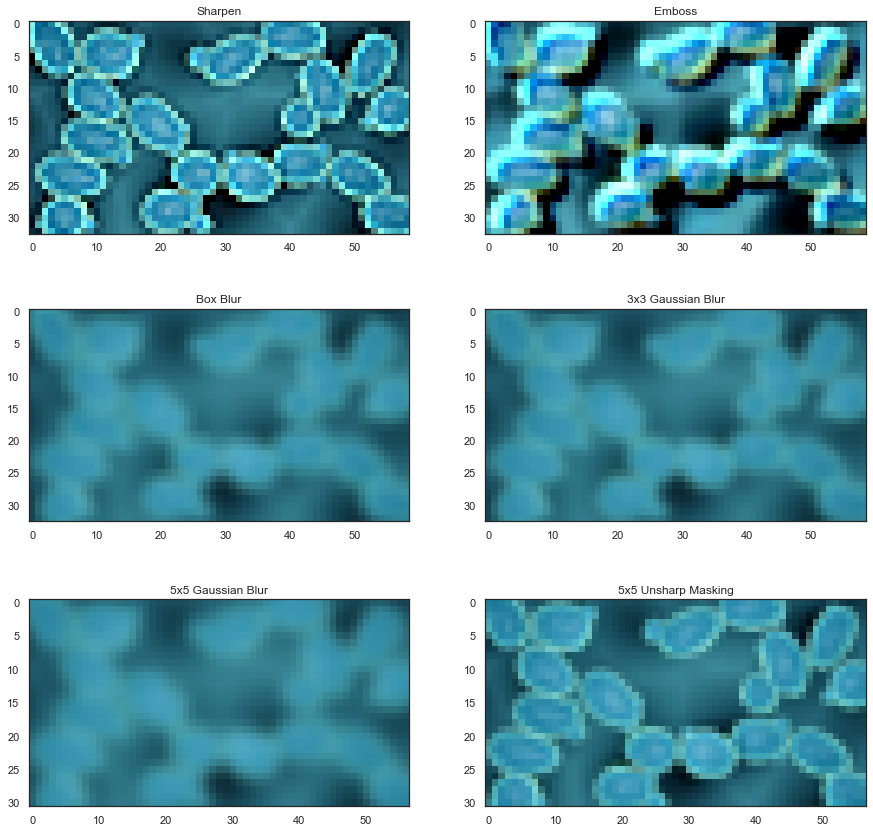

In [125]:
# Sharpen
kernel7 = np.array([[0, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]])
# Emboss
kernel8 =  np.array([[-2, -1, 0],
                     [-1,  1, 1],
                     [ 0,  1, 2]])
# Box Blur
kernel9 = (1 / 9.0) * np.array([[1, 1, 1],
                                [1, 1, 1],
                                [1, 1, 1]])
# Gaussian Blur 3x3
kernel10 = (1 / 16.0) * np.array([[1, 2, 1],
                                  [2, 4, 2],
                                  [1, 2, 1]])
# Gaussian Blur 5x5
kernel11 = (1 / 256.0) * np.array([[1, 4, 6, 4, 1],
                                   [4, 16, 24, 16, 4],
                                   [6, 24, 36, 24, 6],
                                   [4, 16, 24, 16, 4],
                                   [1, 4, 6, 4, 1]])
# Unsharp masking 5x5
kernel12 = -(1 / 256.0) * np.array([[1, 4, 6, 4, 1],
                                   [4, 16, 24, 16, 4],
                                   [6, 24, -476, 24, 6],
                                   [4, 16, 24, 16, 4],
                                   [1, 4, 6, 4, 1]])

kernels = [kernel7, kernel8, kernel9, kernel10, kernel11, kernel12]
kernel_name = ['Sharpen', 'Emboss', 'Box Blur', 
               '3x3 Gaussian Blur', '5x5 Gaussian Blur', 
               '5x5 Unsharp Masking']

figure, axis = plt.subplots(3,2, figsize=(15,15))
for kernel, name, ax in zip(kernels, kernel_name, axis.flatten()):
     conv_im1 = rgb_convolve2d(yeast_scaled, 
                               kernel[::-1, ::-1]).clip(0,1)
     ax.imshow(abs(conv_im1), cmap='gray')
     ax.set_title(name)

**Exercise** User your own image and repeat the kernel operations on it. What do you observe?

In [ ]:
# Your code here

## Data augmentation

Here are a few common techniques:
- Flip
- Rotate
- Crop
- Zoom

**Exercise** Try to create 10 images from the original one using these techniques (e.g., crop it, rotate it, flip it).

In [ ]:
# Your code here

## Labeling components

*Labeling* means assigning identifiers to contiguous groups of pixels in an image. Given a labeling, we can treat each component in isolation, instead of operating on the whole image. 

Here are a few shapes drawn on a binary image. But how many?

C:\Users\fiacac\AppData\Local\Temp/ipykernel_22180/3908272275.py:2: FutureWarning: `draw.circle` is deprecated in favor of `draw.disk`.`draw.circle` will be removed in version 0.19
  rr, cc = draw.circle(4, 3, 3)
C:\Users\fiacac\AppData\Local\Temp/ipykernel_22180/3908272275.py:5: FutureWarning: `draw.circle` is deprecated in favor of `draw.disk`.`draw.circle` will be removed in version 0.19
  rr, cc = draw.circle(8, 10, 4)


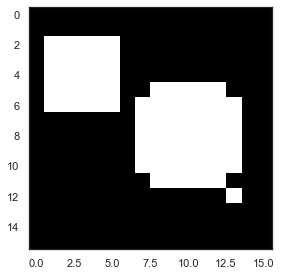

In [75]:
canvas = np.zeros((16, 16))
rr, cc = draw.circle(4, 3, 3)
canvas[rr, cc] = 1

rr, cc = draw.circle(8, 10, 4)
canvas[rr, cc] = 1

canvas[12, 13] = 1

imshow(canvas);

In [133]:
regions, n_regions = measure.label(canvas, background=0, return_num=True)
print("Number of regions", n_regions)
regions

Number of regions 2


array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 1, 1, 1, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0],
       [0, 1, 1, 1, 1, 1, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

### 4-connectivity vs. 8-connectivity
Whether two pixels are neighbours is a question of definition. Is a pixel that is one to the right and one up a neighbour of another? This is the distinction of 4-connectivity (a pixel has 4 neighbours) and 8-connectivity (8 neighbours). 

`measure.label` lets you define connectivity via the `neighbors` argument. 

**Exercise** Compute the regions as above, but with 4-connectivity.

In [ ]:
# Using 4-connectivity
# Your code here

Finally, labeled matrices may be converted into color images for visual inspection of the result.  

C:\Users\fiacac\AppData\Local\Temp/ipykernel_22180/1017078092.py:1: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  imshow(color.label2rgb(regions))


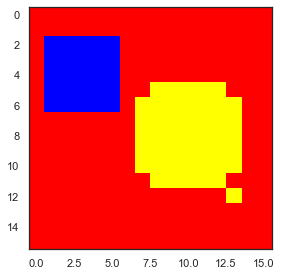

In [134]:
imshow(color.label2rgb(regions))